In [1]:
# --- 1. Import Section ---
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mnist_custom.npz to mnist_custom.npz


In [22]:
# --- 2. Load and Combine Datasets ---

# Load the standard MNIST dataset
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

# Load your custom dataset from the .npz file
with np.load("/content/mnist_custom.npz") as data:
    custom_x_train = data['trainX']
    custom_y_train = data['trainY']
    custom_x_test = data['testX']
    custom_y_test = data['testY']

In [23]:
# --- 3. Preprocess and Normalize Section ---

# Normalize all pixel values to be between 0 and 1
mnist_x_train = mnist_x_train.astype("float32") / 255.0
mnist_x_test = mnist_x_test.astype("float32") / 255.0
custom_x_train = custom_x_train.astype("float32") / 255.0
custom_x_test = custom_x_test.astype("float32") / 255.0

# Combine the MNIST and your custom training sets
combined_x_train = np.concatenate((mnist_x_train, custom_x_train))
combined_y_train = np.concatenate((mnist_y_train, custom_y_train))

print(f"Combined training data shape: {combined_x_train.shape}")
print(f"MNIST test data shape: {mnist_x_test.shape}")
print(f"Custom test data shape: {custom_x_test.shape}")

Combined training data shape: (62574, 28, 28)
MNIST test data shape: (10000, 28, 28)
Custom test data shape: (644, 28, 28)


In [24]:
# --- 4. Neural Network Section ---

# Define the FCNN model using the same architecture as your example
inputs = Input((28, 28))
x = Flatten()(inputs)
x1 = Dense(256, activation="relu")(x)
x2 = Dense(128, activation="relu")(x1)
x3 = Dense(64, activation="relu")(x2)
x4 = Dense(32, activation="relu")(x3)
x5 = Dense(16, activation="relu")(x4)
outputs = Dense(10, activation="softmax")(x5)
model = Model(inputs, outputs)


In [25]:
# --- 5. Compile Section ---

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [32]:
# --- 6. Model Fitting ---

history = model.fit(
    combined_x_train, combined_y_train,
    epochs=20,  # Using 20 epochs for a balance of speed and performance
    batch_size=32,
    validation_data=(mnist_x_test, mnist_y_test) # Validate on standard MNIST test set
)

Epoch 1/20
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.9819 - val_loss: 0.4347
Epoch 2/20
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9948 - loss: 0.0219 - val_accuracy: 0.9825 - val_loss: 0.4769
Epoch 3/20
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9957 - loss: 0.0170 - val_accuracy: 0.9831 - val_loss: 0.3698
Epoch 4/20
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9957 - loss: 0.0116 - val_accuracy: 0.9833 - val_loss: 0.5658
Epoch 5/20
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9956 - loss: 0.0129 - val_accuracy: 0.9833 - val_loss: 0.5247
Epoch 6/20
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9956 - loss: 0.0136 - val_accuracy: 0.9836 - val_loss: 0.6547
Epoch 7/20
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9954 - loss: 0.0139 - val_accuracy: 0.9833 - val_loss: 0.8284
Epoch 8/20
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9948 - loss: 0.0189


--- Evaluating Final Accuracy ---
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Custom Test Set Accuracy: 76.86%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MNIST Test Set Accuracy: 98.16%


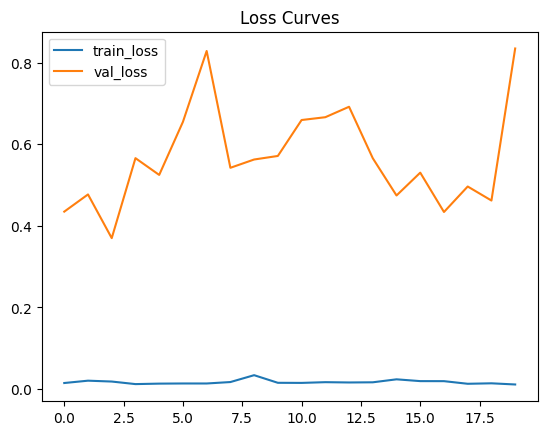

In [33]:
# --- 7. Predict Accuracy and Plot Validation Loss ---

print("\n--- Evaluating Final Accuracy ---")
# Predict on your custom test set
y_prob_custom = model.predict(custom_x_test)
y_pred_custom = y_prob_custom.argmax(axis=1)
acc_custom = accuracy_score(custom_y_test, y_pred_custom)
print(f"Custom Test Set Accuracy: {acc_custom * 100:.2f}%")

# Predict on the standard MNIST test set
y_prob_mnist = model.predict(mnist_x_test)
y_pred_mnist = y_prob_mnist.argmax(axis=1)
acc_mnist = accuracy_score(mnist_y_test, y_pred_mnist)
print(f"MNIST Test Set Accuracy: {acc_mnist * 100:.2f}%")

# Plot the training and validation loss curves
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curves')
plt.legend()
plt.show()


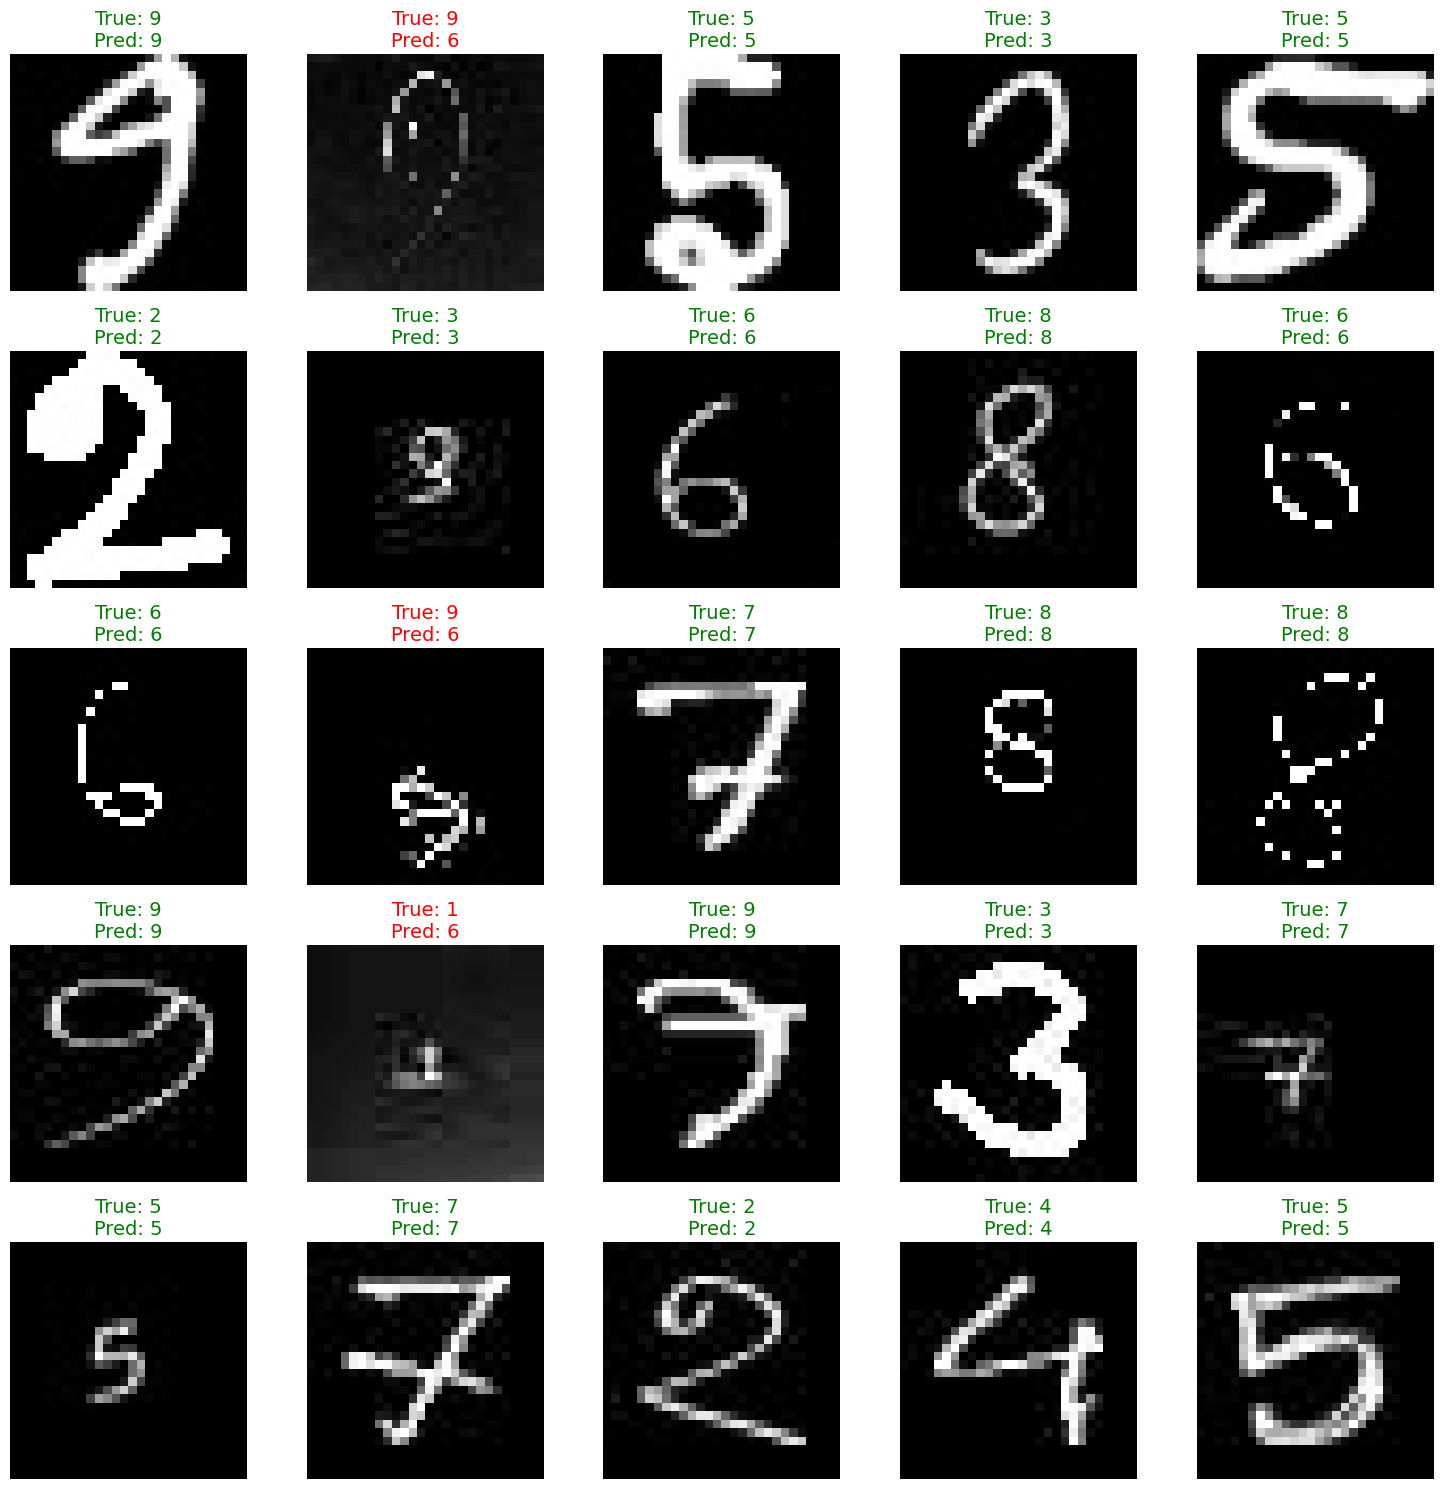

In [28]:
# --- 8. Predict and Plot Images with Labels (from your Custom Test Set) ---

plt.figure(figsize=(15, 15))
# Determine the number of images to show (up to 25)
n_show = min(25, len(custom_x_test))
rows, cols = 5, 5

for i in range(n_show):
    plt.subplot(rows, cols, i + 1)

    # Get the image and its true label
    image = custom_x_test[i]
    true_label = custom_y_test[i]

    # Reshape for prediction and get the predicted label
    pred_label = y_pred_custom[i]

    # Set title color
    title_color = 'green' if pred_label == true_label else 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=title_color, fontsize=14)
    plt.imshow(image, cmap="gray")
    plt.axis('off')

plt.tight_layout()
plt.show()